In [1]:
import sys
import pandas as pd

parent_dir = '/home/sei/tetrahedron_pair_ML'
sys.path.append(parent_dir)

tetrahedron_dataset = pd.read_csv('/home/sei/tetrahedron_pair_ML/data/processed/train/train_data.csv')

### Dataset Structure:

In [2]:
tetrahedron_dataset.head()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
0,0.041267,0.079439,0.993029,0.903185,0.713471,0.566459,0.660674,0.098778,0.294825,0.346379,...,0.053174,0.195358,0.036265,0.362226,0.582560,0.337229,0.521980,0.311852,130.381283,1
1,0.532851,0.757320,0.816949,0.191593,0.058363,0.827834,0.601502,0.237787,0.739839,0.164519,...,0.746902,0.482620,0.358849,0.253916,0.773571,0.950850,0.699500,0.985609,574.541440,1
2,0.114892,0.616077,0.386924,0.669297,0.297472,0.153548,0.149908,0.842604,0.243203,0.877940,...,0.273958,0.197692,0.611868,0.000568,0.505229,0.982992,0.174301,0.623302,0.000000,0
3,0.519391,0.443744,0.644389,0.059490,0.024940,0.723233,0.942961,0.242811,0.057266,0.488990,...,0.155547,0.812065,0.089099,0.064784,0.089684,0.589516,0.156822,0.692980,9602.254582,1
4,0.310150,0.688363,0.055144,0.389536,0.721358,0.744196,0.837128,0.633351,0.246919,0.509750,...,0.875987,0.031956,0.637623,0.089737,0.112506,0.526863,0.507669,0.380716,7138.061062,1


- **Tetrahedrons:**
  - Each entry includes two tetrahedrons.
  - Each tetrahedron has four vertices.
  - Each vertex is defined by three coordinates (x, y, z).

- **Features:**
  - There are 12 features per tetrahedron, leading to 24 features total.
  - Column names follow the pattern `Tₜ_Vᵥ_α`, where:
    - `ₜ` = Tetrahedron number (1 or 2)
    - `ᵥ` = Vertex number (1 to 4)
    - `α` = Coordinate axis (x, y, or z)
  - Coordinates are normalized between 0 and 1.
  - Each coordinate is randomly generated through a i.i.d process.

- **Output Variables:**
  - **Intersection Status:**
    - Stored in the "intersection_status" column.
    - Values: `0` (no intersection) or `1` (intersection).
  - **Intersection Volume:**
    - Stored in the "intersection_volume" column.
    - Value is a non-negative real number.

### Input and Output Spaces:

- **Input Space:**
  - Represented as a vector in $\mathbb{R}^{24}$, where each coordinate is within the range $[0, 1]$.

- **Output Space:**
  - $\{0, 1\}$ for "HasIntersection".
  - $\mathbb{R}^{\geq 0}$ for "IntersectionVolume"

### Statistics


In [3]:
tetrahedron_dataset.describe()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500935,0.499453,0.500680,0.499646,0.499460,0.500017,0.501902,0.499313,0.500218,0.499301,...,0.498299,0.497902,0.500415,0.499432,0.499782,0.499284,0.500601,0.499394,1349.892102,0.570000
std,0.290974,0.290853,0.290951,0.290664,0.291378,0.291379,0.291480,0.290784,0.291013,0.291169,...,0.282341,0.282228,0.281849,0.283072,0.282898,0.274856,0.281894,0.282559,2679.161317,0.495078
min,0.000007,0.000006,0.000004,0.000018,0.000031,0.000014,0.000010,0.000010,0.000003,0.000011,...,-0.246111,-0.238935,-0.346197,-0.273733,-0.225038,-0.041924,-0.026250,-0.038941,0.000000,0.000000
25%,0.246918,0.245095,0.247289,0.246348,0.244887,0.245268,0.247746,0.244230,0.246388,0.244684,...,0.261334,0.260644,0.263340,0.261010,0.261699,0.274063,0.263847,0.260936,0.000000,0.000000
50%,0.500682,0.500253,0.501489,0.499813,0.499523,0.498856,0.501829,0.498953,0.499960,0.498169,...,0.498400,0.496725,0.500355,0.497820,0.499307,0.499253,0.501985,0.499401,0.000000,1.000000
75%,0.754965,0.752003,0.754418,0.753291,0.754907,0.755330,0.757641,0.752364,0.754095,0.752512,...,0.734612,0.734923,0.735713,0.737850,0.738187,0.724178,0.737598,0.738713,739.573974,1.000000
max,0.999986,0.999994,0.999985,0.999996,0.999989,0.999985,0.999947,0.999974,0.999971,0.999997,...,1.256083,1.259693,1.261762,1.256121,1.307527,1.028809,1.106928,1.150640,9999.943383,1.000000


#### Class Balance

In [4]:
total_entries = len(tetrahedron_dataset)
status_0_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 0].shape[0]
status_1_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1].shape[0]

percentage_status_0 = (status_0_count / total_entries) * 100
percentage_status_1 = (status_1_count / total_entries) * 100

print(f"Percentage of entries with HasIntersection = 0: {percentage_status_0:.2f}%")
print(f"Percentage of entries with HasIntersection = 1: {percentage_status_1:.2f}%")

Percentage of entries with HasIntersection = 0: 43.00%
Percentage of entries with HasIntersection = 1: 57.00%


#### Coordinates precision

In [5]:
# Extract all coordinate columns
coordinate_columns = [col for col in tetrahedron_dataset.columns if '_v' in col]

def calculate_precision(value):
    value_str = str(value)
    if '.' in value_str:
        return len(value_str.split('.')[1])
    else:
        return 0

max_precision = 0
min_precision = float('inf')

for col in coordinate_columns:
    col_precision = tetrahedron_dataset[col].map(calculate_precision)
    max_precision = max(max_precision, col_precision.max())
    min_precision = min(min_precision, col_precision.min())

print(f"Min coordinate precision in the dataset: {min_precision} decimal places")
print(f"Max coordinate precision in the dataset: {max_precision} decimal places")

Min coordinate precision in the dataset: 6 decimal places
Max coordinate precision in the dataset: 16 decimal places


#### Coordinates distribution

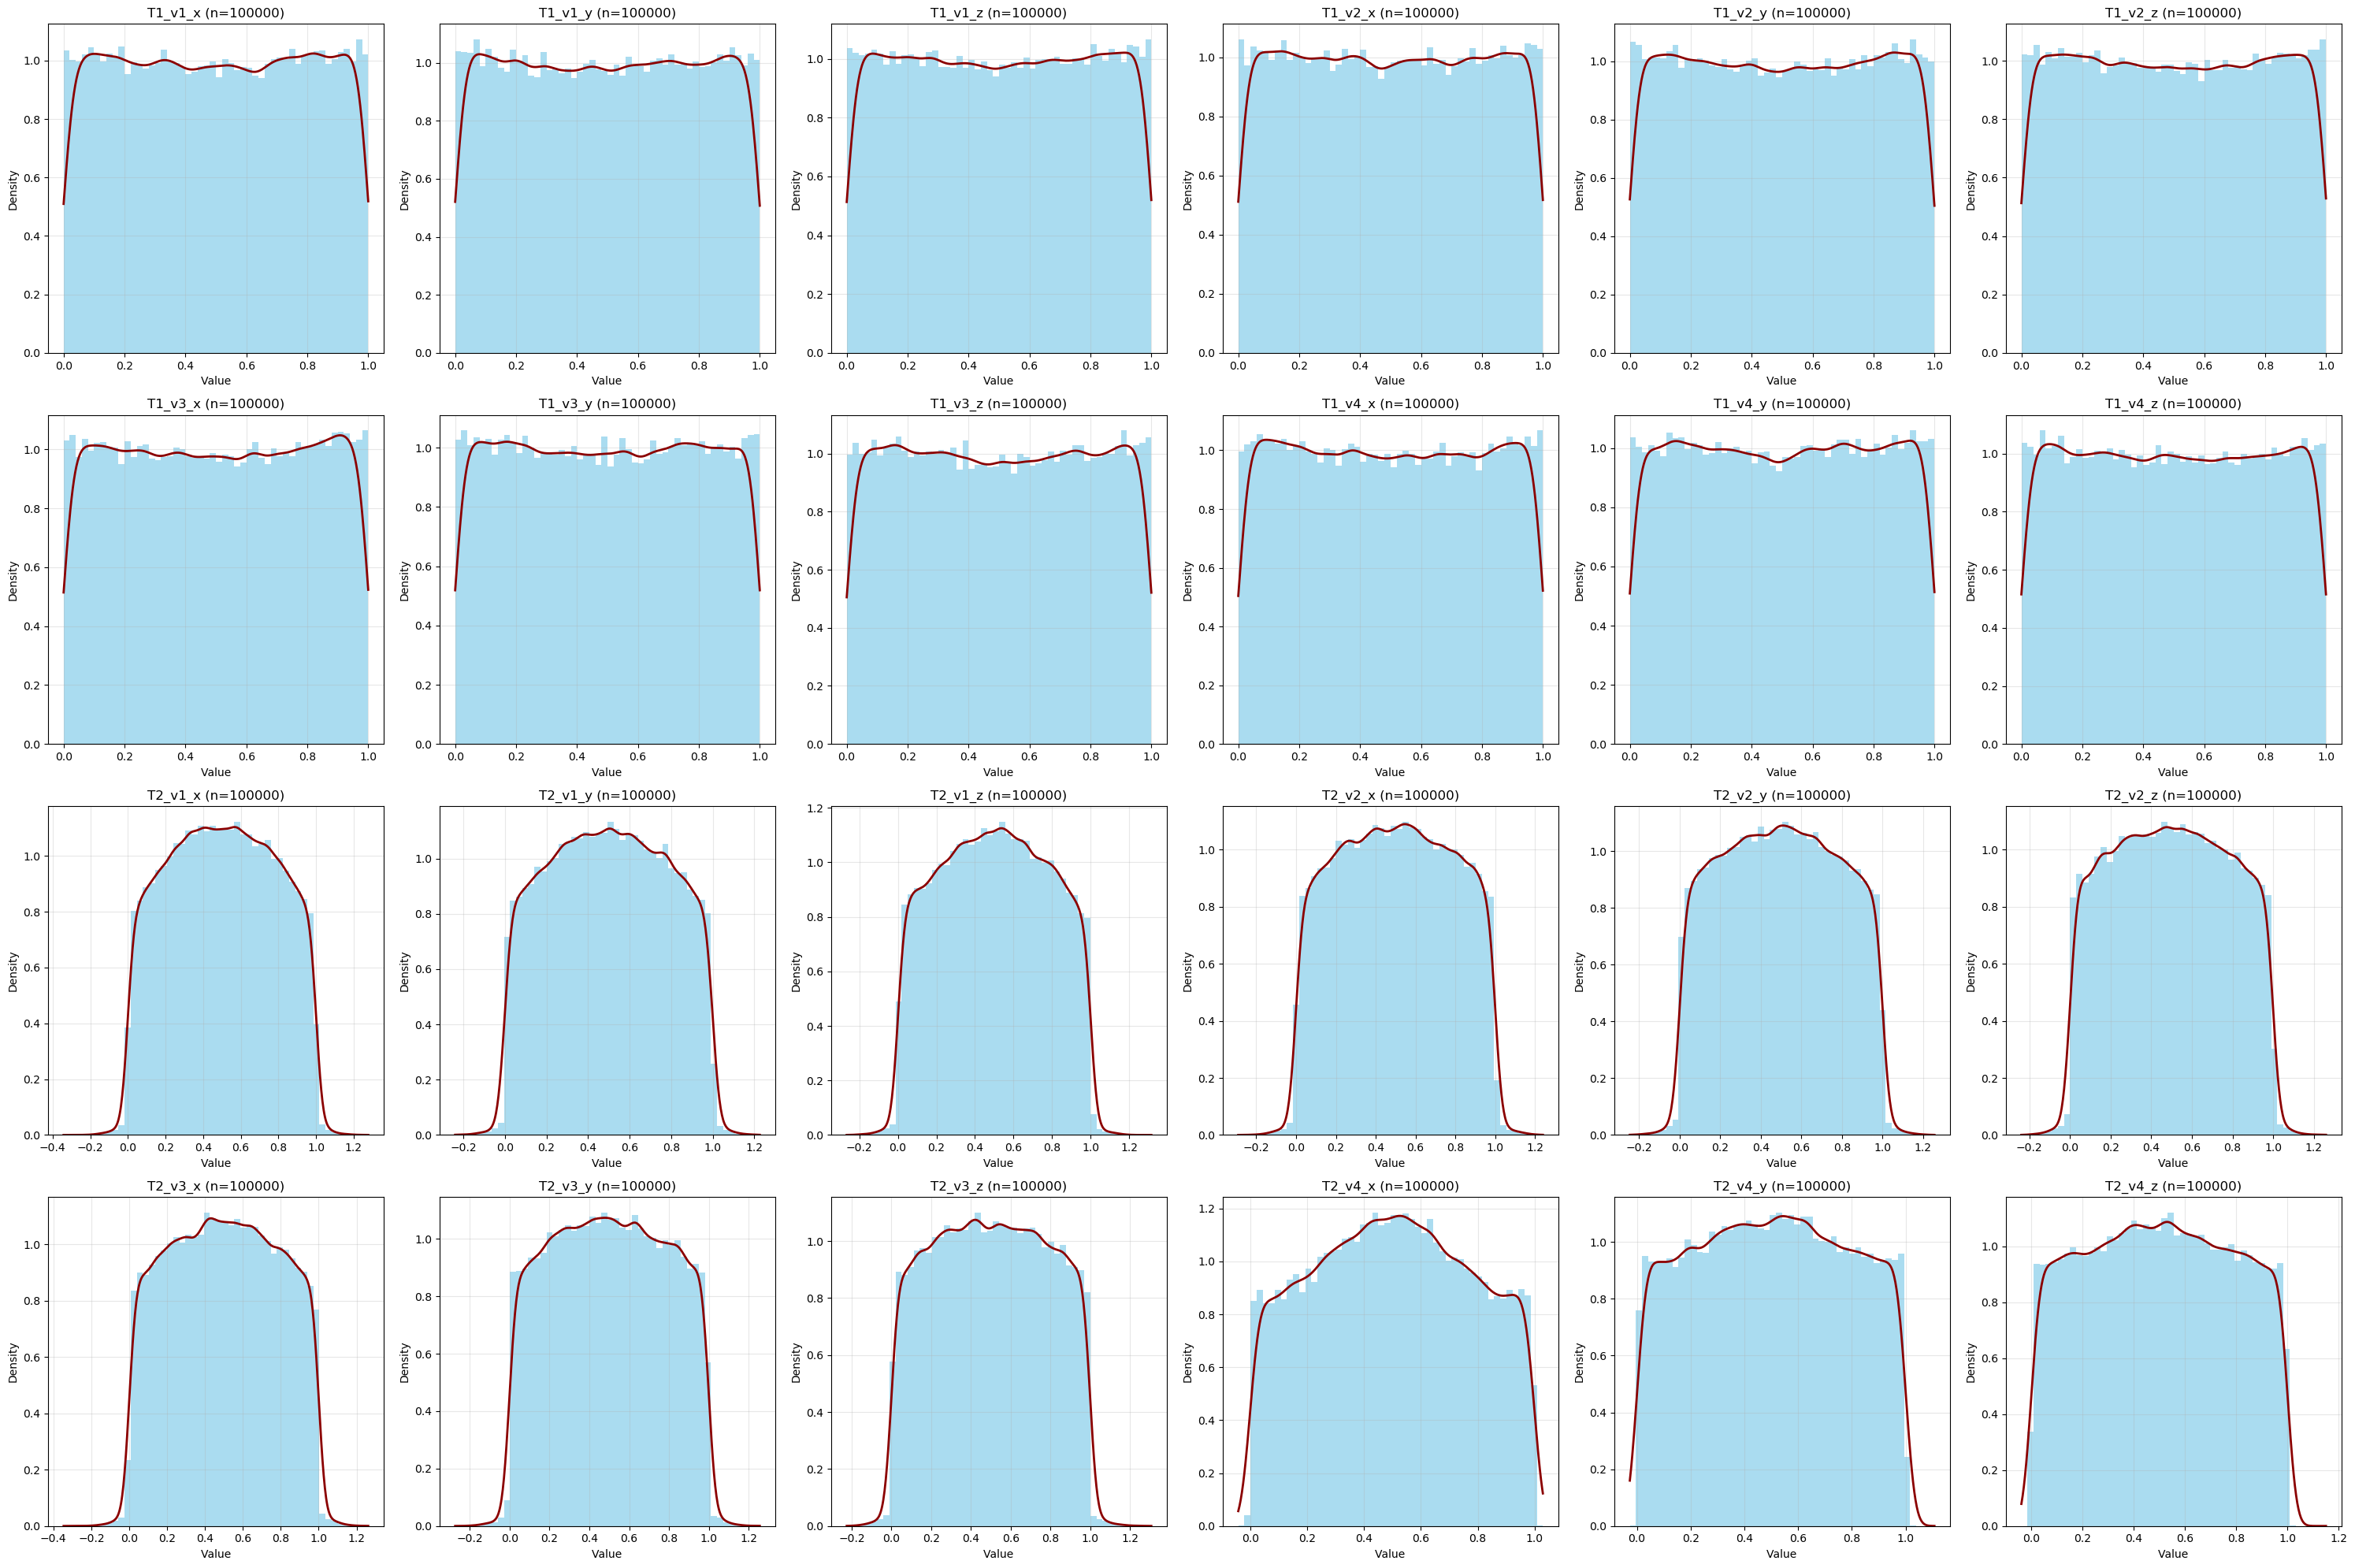

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.stats import gaussian_kde

# Define tetrahedrons, points, and coordinates
tetrahedrons = ['T1', 'T2']
points = ['v1', 'v2', 'v3', 'v4']
coordinates = ['x', 'y', 'z']

# Build the list of column names in the order: T1_v1_x, T1_v1_y, T1_v1_z, ..., T2_v4_z
columns = [f'{tetra}_{point}_{coord}' for tetra in tetrahedrons for point in points for coord in coordinates]

# Create a grid of subplots: 6 rows x 4 columns (6*4 = 24)
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(30, 20))
axes = axes.flatten()  # Flatten the array for easy iteration

for ax, col in zip(axes, columns):
    # Extract the data for the current column from the DataFrame
    data = np.ravel(tetrahedron_dataset[col].to_numpy(copy=False))
    
    # Plot the histogram (normalized to density)
    ax.hist(data, bins=50, color='skyblue', density=True, alpha=0.7)
    
    # Compute and plot the Kernel Density Estimate
    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 500)
    ax.plot(x_vals, kde(x_vals), color='darkred', lw=2)
    
    # Formatting
    ax.set_title(f'{col} (n={len(data)})', fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Tetrahedron volume distribution

In [7]:
### Get Data ###
import src.GeometryUtils as gu


def extract_t1_vertices(row):
    return torch.tensor([
        [row['T1_v1_x'], row['T1_v1_y'], row['T1_v1_z']],
        [row['T1_v2_x'], row['T1_v2_y'], row['T1_v2_z']],
        [row['T1_v3_x'], row['T1_v3_y'], row['T1_v3_z']],
        [row['T1_v4_x'], row['T1_v4_y'], row['T1_v4_z']]
    ])

def extract_t2_vertices(row):
    return torch.tensor([
        [row['T2_v1_x'], row['T2_v1_y'], row['T2_v1_z']],
        [row['T2_v2_x'], row['T2_v2_y'], row['T2_v2_z']],
        [row['T2_v3_x'], row['T2_v3_y'], row['T2_v3_z']],
        [row['T2_v4_x'], row['T2_v4_y'], row['T2_v4_z']]
    ])

t1_volumes = []
t2_volumes = []
for _, row in tetrahedron_dataset.iterrows():
    t1_vertices = extract_t1_vertices(row)
    volume = gu.calculate_tetrahedron_volume(t1_vertices)
    t1_volumes.append(volume.item())

    t2_vertices = extract_t2_vertices(row)
    volume = gu.calculate_tetrahedron_volume(t2_vertices)
    t2_volumes.append(volume.item())

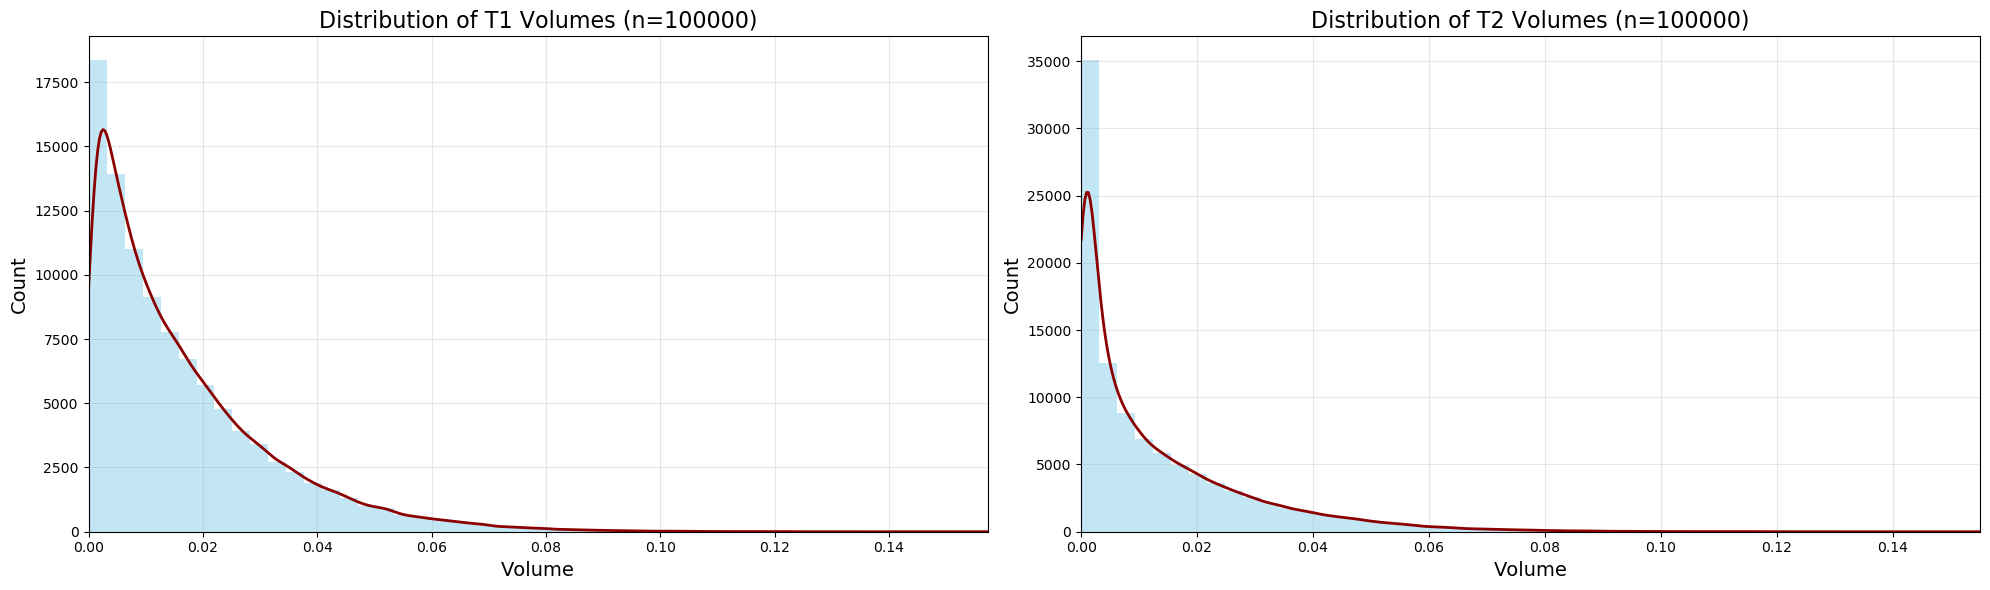

In [8]:
volumes_t1 = np.array(t1_volumes).ravel()
volumes_t2 = np.array(t2_volumes).ravel()

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot for T1
counts, bins, _ = axes[0].hist(volumes_t1, bins=50, color='skyblue', alpha=0.5)
kde = gaussian_kde(volumes_t1)
x = np.linspace(volumes_t1.min(), volumes_t1.max(), 500)
axes[0].plot(x, kde(x) * len(volumes_t1) * (bins[1] - bins[0]), color='darkred', lw=2)
axes[0].set_title(f'Distribution of T1 Volumes (n={len(volumes_t1)})', fontsize=16)
axes[0].set_xlabel('Volume', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].set_xlim(0, volumes_t1.max())
axes[0].grid(True, alpha=0.3)

# Plot for T2
counts, bins, _ = axes[1].hist(volumes_t2, bins=50, color='skyblue', alpha=0.5)
kde = gaussian_kde(volumes_t2)
x = np.linspace(volumes_t2.min(), volumes_t2.max(), 500)
axes[1].plot(x, kde(x) * len(volumes_t2) * (bins[1] - bins[0]), color='darkred', lw=2)
axes[1].set_title(f'Distribution of T2 Volumes (n={len(volumes_t2)})', fontsize=16)
axes[1].set_xlabel('Volume', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].set_xlim(0, volumes_t2.max())
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Intersection volume distribution

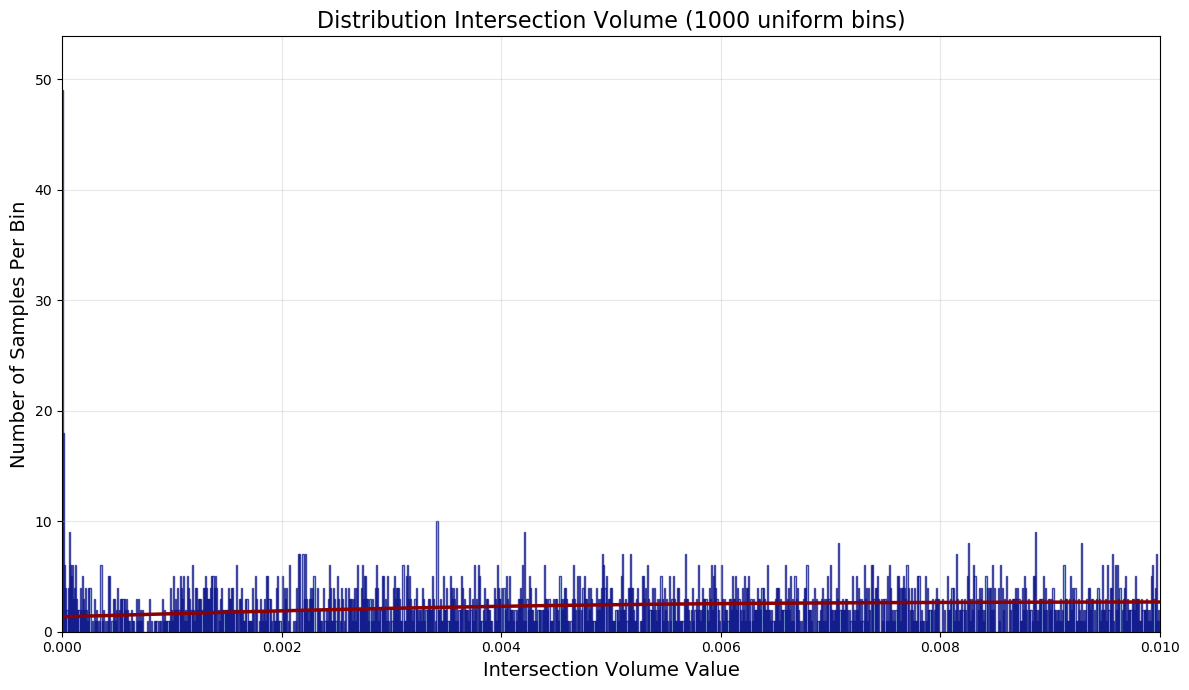

In [9]:
intersecting_cases = tetrahedron_dataset[tetrahedron_dataset['IntersectionVolume'] > 0]
scaling_factor = 100000
volumes = intersecting_cases['IntersectionVolume'].to_numpy() / scaling_factor
n_bins = 1000
range_min = 0
range_max = 0.01
plt.figure(figsize=(12, 7))

# Use actual counts instead of density
counts, bins, _ = plt.hist(volumes, 
                                bins=n_bins,
                                range=(range_min, range_max),
                                color='skyblue',
                                edgecolor='navy',
                                alpha=0.7)

# Properly scaled KDE
kde = gaussian_kde(volumes)
x = np.linspace(0, 0.01, n_bins)
bin_width = bins[1] - bins[0]
plt.plot(x, kde(x) * len(volumes) * bin_width,
         color='darkred', 
         lw=2.5)

plt.title(f'Distribution Intersection Volume ({n_bins} uniform bins)', fontsize=16)
plt.xlabel('Intersection Volume Value', fontsize=14)
plt.ylabel('Number of Samples Per Bin', fontsize=14)
plt.xlim(0, 0.01)
plt.ylim(0, counts.max() * 1.1)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

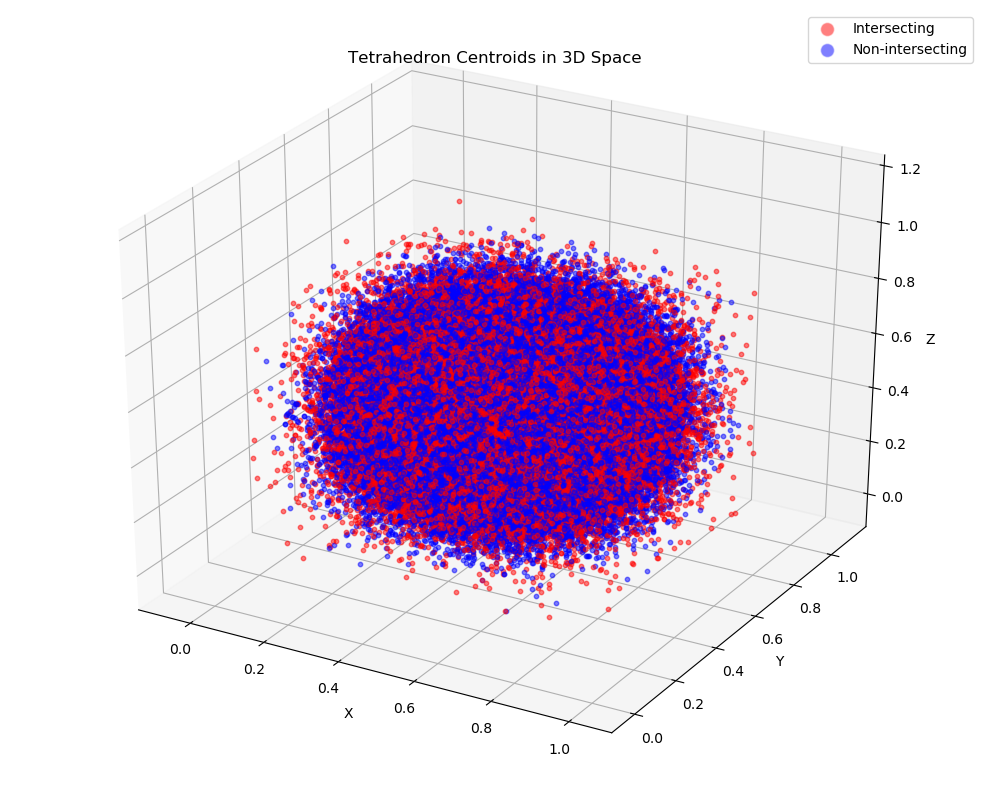

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D  # Import for custom legend

# Assuming you have your dataset loaded as a DataFrame called 'tetrahedron_dataset'
def calculate_centroids(df):
    centroids_t1 = []
    centroids_t2 = []
    has_intersection = []
    for _, row in df.iterrows():
        # Extract vertices for first tetrahedron (T1)
        t1_vertices = []
        for i in range(1, 5): # 4 vertices
            vertex = [row[f'T1_v{i}_x'], row[f'T1_v{i}_y'], row[f'T1_v{i}_z']]
            t1_vertices.append(vertex)
        
        # Extract vertices for second tetrahedron (T2)
        t2_vertices = []
        for i in range(1, 5):
            vertex = [row[f'T2_v{i}_x'], row[f'T2_v{i}_y'], row[f'T2_v{i}_z']]
            t2_vertices.append(vertex)
        
        # Calculate centroids (average of the 4 vertices)
        centroid_t1 = np.mean(t1_vertices, axis=0)
        centroid_t2 = np.mean(t2_vertices, axis=0)
        
        centroids_t1.append(centroid_t1)
        centroids_t2.append(centroid_t2)
        has_intersection.append(row['HasIntersection'])
    
    return np.array(centroids_t1), np.array(centroids_t2), np.array(has_intersection)

# Calculate centroids
centroids_t1, centroids_t2, has_intersection = calculate_centroids(tetrahedron_dataset)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot centroids, color based on intersection
for i in range(len(centroids_t1)):
    color = 'red' if has_intersection[i] else 'blue'
    ax.scatter(centroids_t1[i][0], centroids_t1[i][1], centroids_t1[i][2], c=color, alpha=0.5, s=10)
    ax.scatter(centroids_t2[i][0], centroids_t2[i][1], centroids_t2[i][2], c=color, alpha=0.5, s=10)

# Create custom legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, alpha=0.5, label='Intersecting'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, alpha=0.5, label='Non-intersecting')
]

# Add the legend
ax.legend(handles=legend_elements, loc='upper right')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Tetrahedron Centroids in 3D Space')

plt.tight_layout()
plt.show()